In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

In [2]:
#read the data
store_data = pd.read_csv("C:/Users/test/Downloads/supermarket_sales (1).csv")

In [3]:
#first 5 rows of the data
store_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#last 5 rows of the data
store_data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
#shape of the data
store_data.shape

(1000, 17)

In [6]:
#info of the data
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#describe the data
store_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
#change the data type of the ratings to categorical
store_data['Rating'] = store_data['Rating'].astype('category')

In [9]:
#change the data type of the date to datetime 
store_data['Date'] = pd.to_datetime(store_data['Date'])
#change the data type of the time to datetime
store_data['Time'] = pd.to_datetime(store_data['Time'])

In [10]:
#Drop gross margin percentage
store_data.drop(['gross margin percentage'], axis=1, inplace=True)

In [11]:
#null values
store_data.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

In [12]:
#value counts
store_data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [13]:
store_data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [14]:
#rows with Branch = 'A'
df1 = store_data[store_data['Branch'] == 'A']

In [15]:
#df1 value counts of city
df1['City'].value_counts()

Yangon    340
Name: City, dtype: int64

In [16]:
#rows with Branch = 'B'
df2 = store_data[store_data['Branch'] == 'B']

In [17]:
#df2 value counts of city
df2['City'].value_counts()

Mandalay    332
Name: City, dtype: int64

In [18]:
#drop Branch column
store_data.drop(['Branch'], axis=1, inplace=True)

In [19]:
store_data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [20]:
store_data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [21]:
#Rows where Customer type is member
df3 = store_data[store_data['Customer type'] == 'Member']

In [22]:
df3['Gender'].value_counts()

Female    261
Male      240
Name: Gender, dtype: int64

In [23]:
#value counts of productline
store_data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [24]:
#value counts of payment method
store_data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [25]:
#split Time to Hours and Minute
store_data['Hour'] = store_data['Time'].dt.hour

In [26]:
#Cnveert the hours to Morning, Afternoon, Evening , Night
store_data['Day_time'] =store_data['Hour'].apply(lambda x: 'Morning' if x < 12 and x >= 6 else 'Afternoon' if x < 18 and x >= 12 else 'Evening' if x < 20 and x >= 18 else 'Night')

In [27]:
#drop the time and hour columns
store_data.drop(['Time'], axis=1, inplace=True)

In [28]:
#convert Hour to categorical
store_data['Hour'] = store_data['Hour'].astype('category')

In [29]:
store_data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Hour,Day_time
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,13,Afternoon
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,10,Morning
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,13,Afternoon
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,20,Night
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,10,Morning


In [30]:
#Change the data type of the Day_time to category
store_data['Day_time'] = store_data['Day_time'].astype('category')

In [31]:
#skewness of the data
#store_data.skew()

In [32]:
#Distribution of Unit price
#sns.distplot(store_data["Unit price"])
#plt.axvline(x=store_data["Unit price"].mean(),color='r',linestyle='--',linewidth=2)
##plt.axvline(x=store_data["Unit price"].median(),color='g',linestyle='--',linewidth=2)

In [33]:
#Distribution of tax 5%
#sns.distplot(store_data["Tax 5%"])
#plt.axvline(x=store_data["Tax 5%"].mean(),color='r',linestyle='--',linewidth=2)
#plt.axvline(x=store_data["Tax 5%"].median(),color='g',linestyle='--',linewidth=2)

In [34]:
#Square root transformation of Tax 5%
#store_data["Tax 5%"] = np.sqrt(store_data["Tax 5%"])

In [35]:
#sns.distplot(store_data["Tax 5%"])
#plt.axvline(x=store_data["Tax 5%"].mean(),color='r',linestyle='--',linewidth=2)
#plt.axvline(x=store_data["Tax 5%"].median(),color='g',linestyle='--',linewidth=2)

In [36]:
#Square root transformation of Total
#store_data["Total"] = np.sqrt(store_data["Total"])

In [37]:
#Square root transformation of cogs
#store_data["cogs"] = np.sqrt(store_data["cogs"])

In [38]:
#Square root transformation of gross income
#store_data["gross income"] = np.sqrt(store_data["gross income"])

# <blockquote>**Important**</blockquote> 
### Above codes I have converted to **comments** because I have so doubt with this that we need  transformation for the skewness or not here.. Because if we consider on a perticular the data is not skewed at all , but if we take everyday then the above column data are skewed..
### So if it will be needed to transforform the data then please **uncomment** the above codes..

In [39]:
store_data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Hour,Day_time
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,13,Afternoon
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,10,Morning
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,13,Afternoon
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,20,Night
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,10,Morning


In [40]:
#bar plot of Total group by City
#sns.barplot(x="City", y="Total", data=store_data)


In [41]:
#convert ratings to float
store_data['Rating'] = store_data['Rating'].astype('float')

In [42]:
#convert ratings to very good, good, average, bad, very bad
store_data['Rating Bins'] = store_data['Rating'].apply(lambda x: '9-10' if x >= 9 else '8-9' if x >= 8 and x < 9 else '7-8' if x >= 7 and x < 8 else '6-7' if x >= 6 and x < 7 else '5-6' if x >= 5 and x < 6 else '4-5' if x >= 4 and x < 5 else '3-4' if x >= 3 and x < 4 else '2-3' if x >= 2 and x < 3 else '1-2' if x >= 1 and x < 2 else '0-1' if x >= 0 and x < 1 else '0-0')

In [43]:
#convert ratings to categorical
store_data['Rating'] = store_data['Rating'].astype('category')
store_data['Rating Bins'] = store_data['Rating Bins'].astype('category')

In [44]:
store_data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Hour,Day_time,Rating Bins
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,13,Afternoon,9-10
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,10,Morning,9-10
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,13,Afternoon,7-8
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,20,Night,8-9
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,10,Morning,5-6


# Part-2

<AxesSubplot:xlabel='Gender', ylabel='count'>

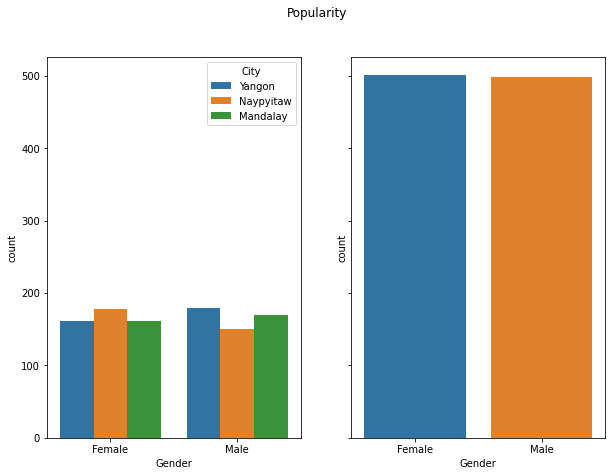

In [45]:
#count plot of Gender
fig, axes = plt.subplots(1, 2, figsize=(10, 7), sharey=True)
fig.suptitle("Popularity")
sns.countplot(ax = axes[0],x='Gender', hue='City', data=store_data)
sns.countplot(ax = axes[1],x='Gender',  data=store_data)

### Here we can see popularity of supermarket is quite similar among male and female, but it varies in different citis ...

<AxesSubplot:xlabel='Rating', ylabel='Count'>

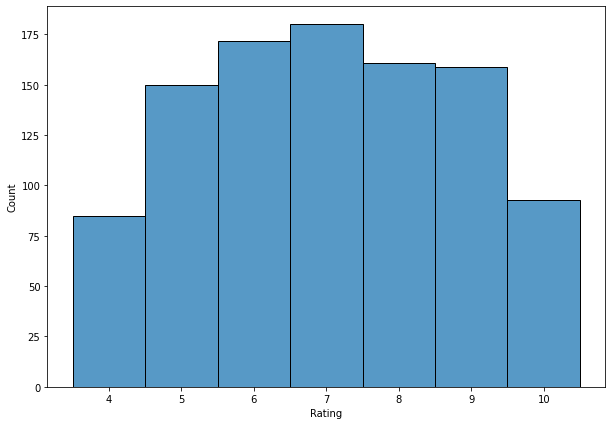

In [46]:
#box plot of ratings
plt.figure(figsize=(10,7))
sns.histplot(store_data["Rating"])

<AxesSubplot:xlabel='Rating Bins', ylabel='count'>

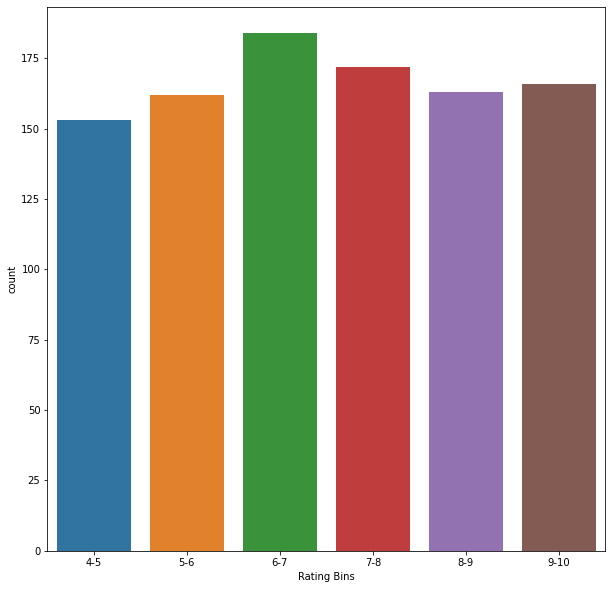

In [47]:
#ratings bins count plot
plt.figure(figsize=(10,10))
sns.countplot(x='Rating Bins',data=store_data)

### We can not get its skewness because it is an ordinal level data..And here we can see there are more people whose ratings lay between 6 to 7..

In [48]:
#group by City and sum of cogs 
df8 = store_data.groupby(['City'])['cogs'].sum().reset_index().sort_values(by='cogs', ascending=False)
df8

,City,cogs
1,Naypyitaw,105303.53
2,Yangon,101143.21
0,Mandalay,101140.64


<AxesSubplot:xlabel='City', ylabel='cogs'>

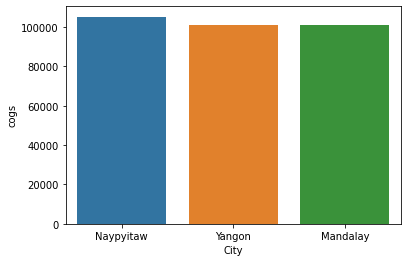

In [49]:
sns.barplot(x="City", y="cogs", data=df8)

### We can see here Naypitraw or branch 'B' has the more sales than others..

<AxesSubplot:xlabel='Payment', ylabel='count'>

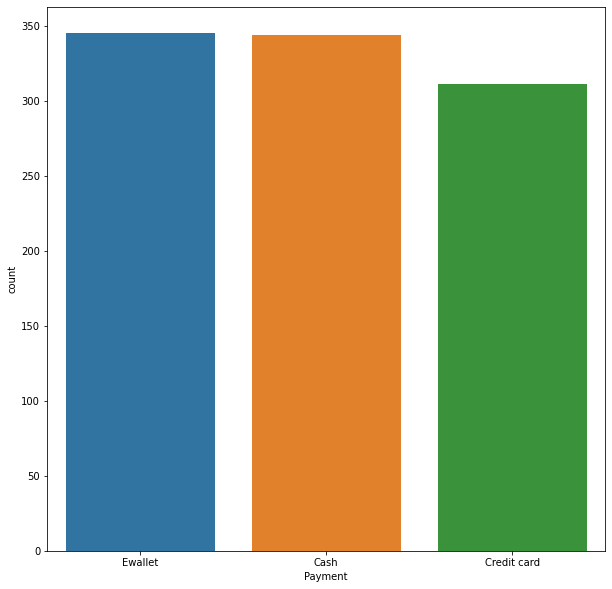

In [50]:
plt.figure(figsize=(10,10))
sns.countplot( x="Payment", data=store_data)

### We can say Ewallet is the most popular payment method used by customoers..

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

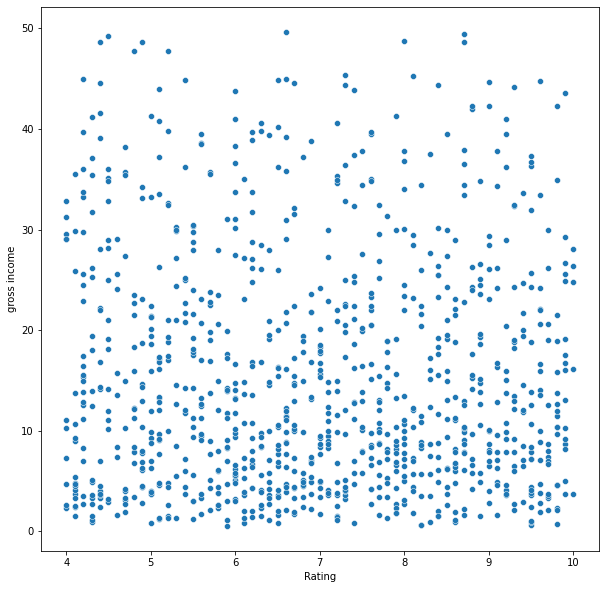

In [51]:
#scatter plot of ratings and gross income
plt.figure(figsize=(10,10))
sns.scatterplot(x="Rating", y="gross income", data=store_data)

### Gross income is not affecting customer rating

In [52]:
#group by city and sum of gross income in a new dataframe
df7 = store_data.groupby(['City'])['gross income'].sum().reset_index().sort_values(by='gross income', ascending=False)
df7

,City,gross income
1,Naypyitaw,5265.1765
2,Yangon,5057.1605
0,Mandalay,5057.0320


<AxesSubplot:xlabel='City', ylabel='gross income'>

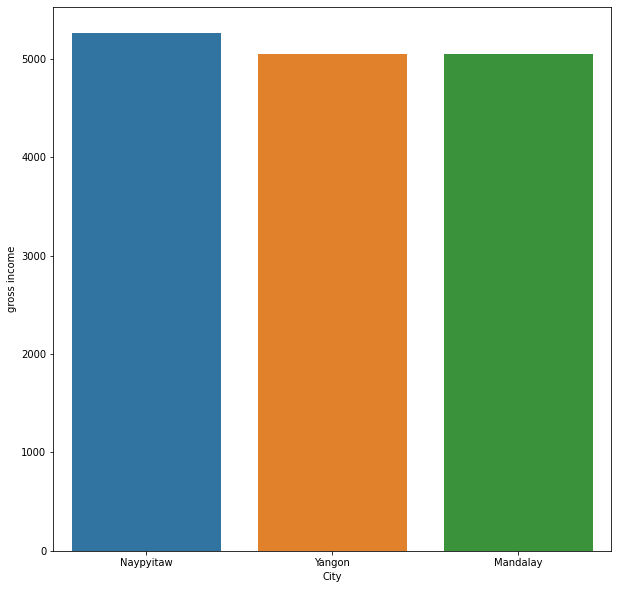

In [53]:
#bar plot between city and gross income
plt.figure(figsize=(10,10))
sns.barplot(x="City", y="gross income", data=df7)

### Naypyitaw or Branch 'B' is the most profitable branch..

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

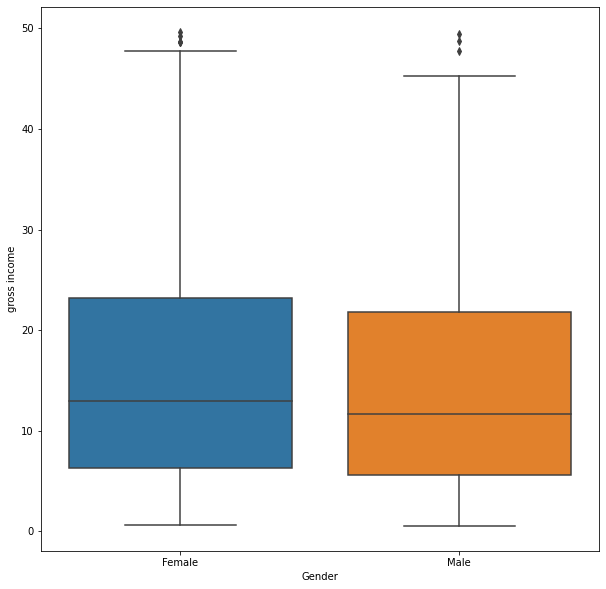

In [54]:
#box plot for gross income of different gender
plt.figure(figsize=(10,10))
sns.boxplot(y='gross income',x='Gender',data=store_data)

### gross income from Male is slightly more than Female, but it is quite similar in both genders..

<AxesSubplot:xlabel='Date', ylabel='gross income'>

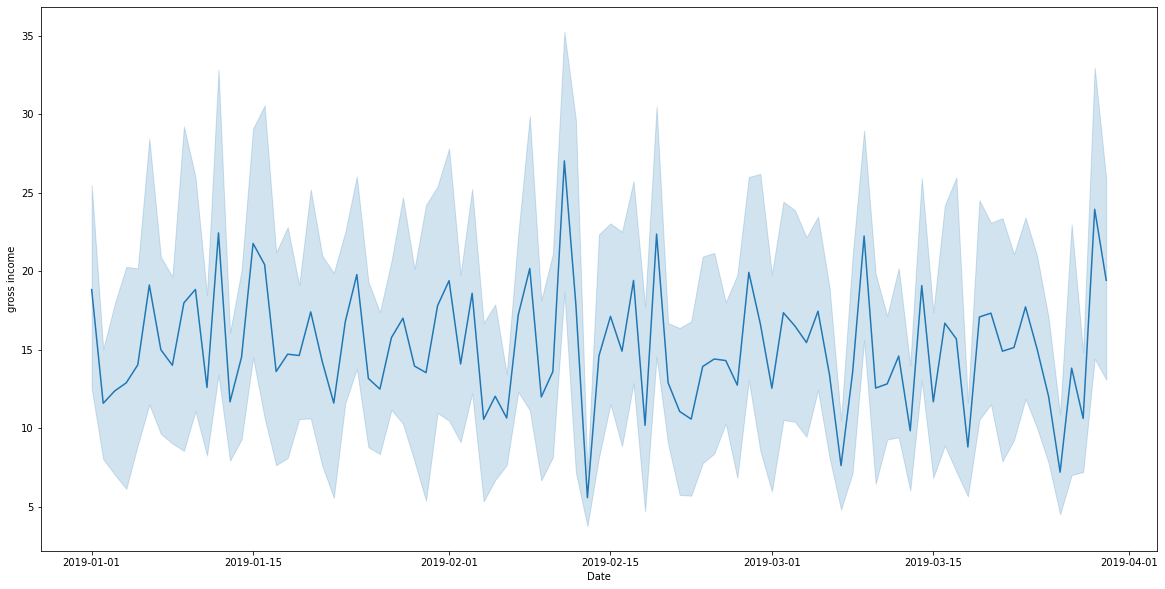

In [55]:
#line plot between date and gross income
plt.figure(figsize=(20,10))
sns.lineplot(x='Date',y='gross income',data=store_data)

### There is not any trend in gross income w.r.t time..

In [56]:
#group by product line and sum of gross income
df6 = store_data.groupby(['Product line'])['gross income'].sum().reset_index().sort_values(by='gross income', ascending=False)
df6

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


<AxesSubplot:xlabel='Product line', ylabel='gross income'>

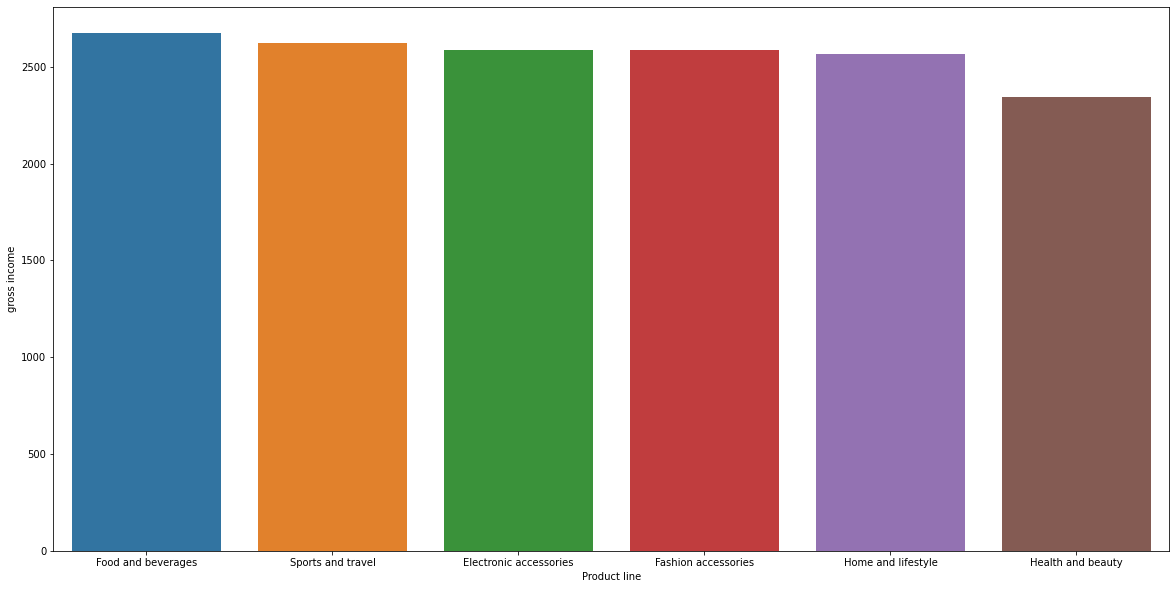

In [57]:
#bar plot between product line and gross income
plt.figure(figsize=(20,10))
sns.barplot(x="Product line", y="gross income", data=df6)

### Food and beverage ihelps to generate more income..

In [58]:
#group by product line and sum of gross income in a new data frame
df5 =  store_data.groupby(['Product line','Gender'])['gross income'].sum().reset_index()
df5

,Product line,Gender,gross income
0,Electronic accessories,Female,1290.5725
1,Electronic accessories,Male,1296.9290
2,Fashion accessories,Female,1449.4000
3,Fashion accessories,Male,1136.5950
4,Food and beverages,Female,1579.5675
5,Food and beverages,Male,1093.9965
6,Health and beauty,Female,883.8565
7,Health and beauty,Male,1458.7025
8,Home and lifestyle,Female,1430.3275
9,Home and lifestyle,Male,1134.5255


<AxesSubplot:xlabel='Product line', ylabel='gross income'>

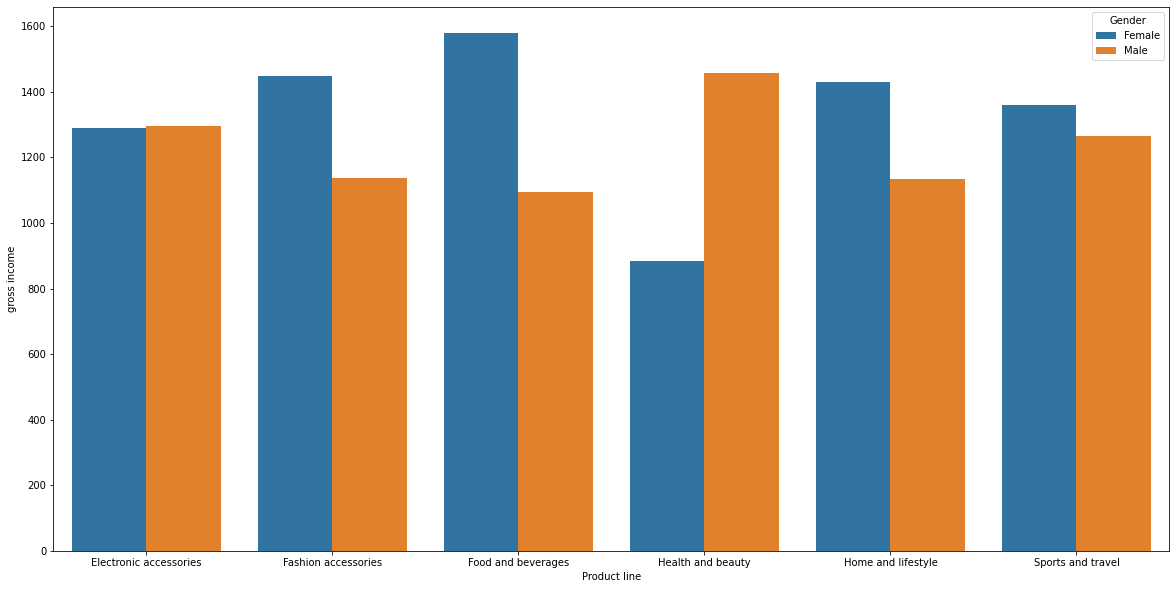

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x="Product line", y="gross income",hue='Gender', data=df5)

### Here we can see where males and females are spending more ...

<AxesSubplot:xlabel='Product line', ylabel='count'>

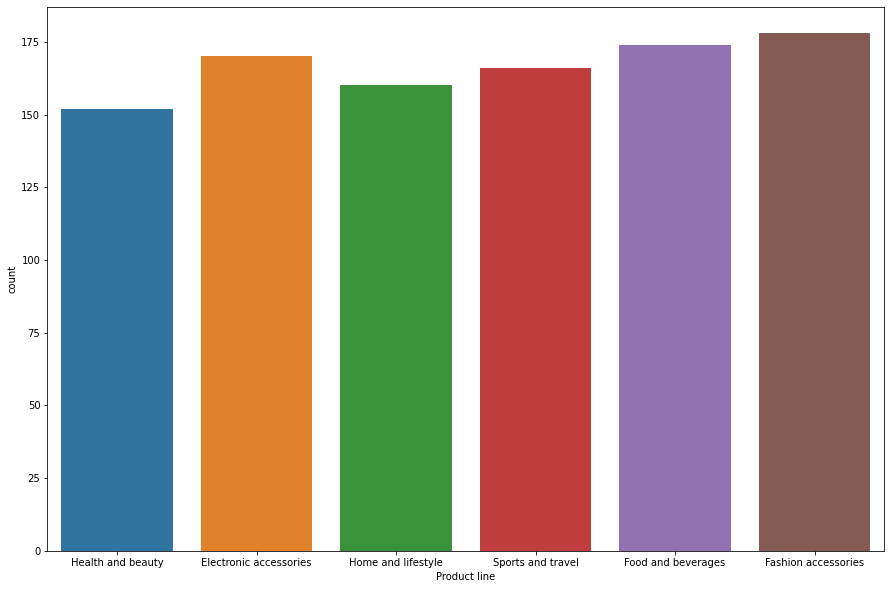

In [60]:
plt.figure(figsize=(15,10))
sns.countplot(x='Product line',data=store_data)

### here we can see how many products were brought by customers in different product line..

In [61]:
#convert date to Day of the week
store_data['Day of the week'] = store_data['Date'].dt.dayofweek

In [62]:
#Convert the day of the week to Day name
store_data['Day of the week'] = store_data['Day of the week'].apply(lambda x: 'Monday' if x == 0 else 'Tuesday' if x == 1 else 'Wednesday' if x == 2 else 'Thursday' if x == 3 else 'Friday' if x == 4 else 'Saturday' if x == 5 else 'Sunday')

In [63]:
#convert day of the week to category
store_data['Day of the week'] = store_data['Day of the week'].astype('category')

In [64]:
store_data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Hour,Day_time,Rating Bins,Day of the week
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,13,Afternoon,9-10,Saturday
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,10,Morning,9-10,Friday
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,13,Afternoon,7-8,Sunday
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,20,Night,8-9,Sunday
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,10,Morning,5-6,Friday


In [65]:
#group by day of the week and total cogs in a new dataframe
df4 = store_data.groupby(['Day of the week'])['cogs'].sum().reset_index().sort_values(by='cogs', ascending=False)
df4

,Day of the week,cogs
2,Saturday,53448.39
5,Tuesday,49030.71
4,Thursday,43189.76
3,Sunday,42340.85
0,Friday,41834.61
6,Wednesday,41648.70
1,Monday,36094.36


<AxesSubplot:xlabel='Day of the week', ylabel='cogs'>

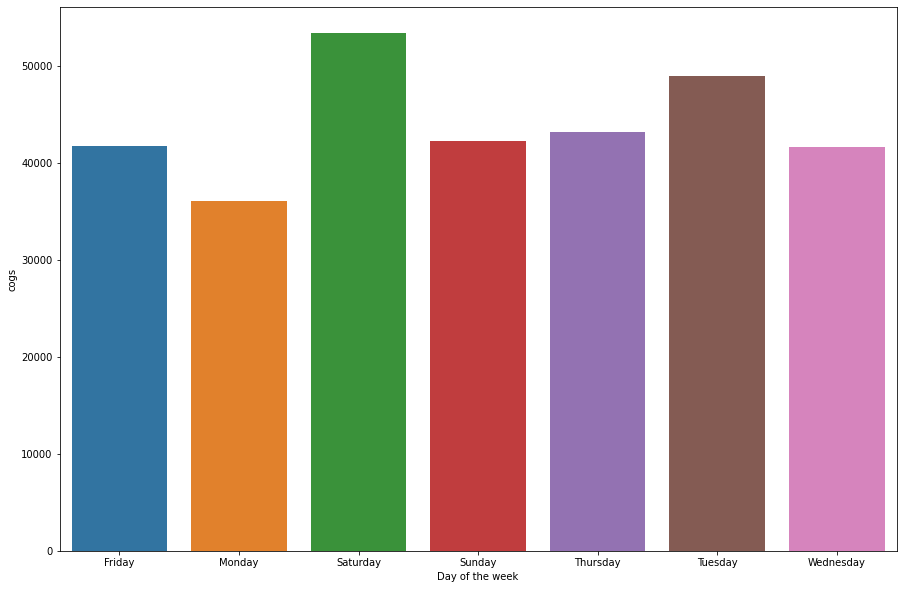

In [66]:
plt.figure(figsize=(15,10))
sns.barplot(x="Day of the week", y="cogs", data=df4)

### Here we can see saturday or 7th number of every week has maximum sales..

<AxesSubplot:xlabel='Hour', ylabel='count'>

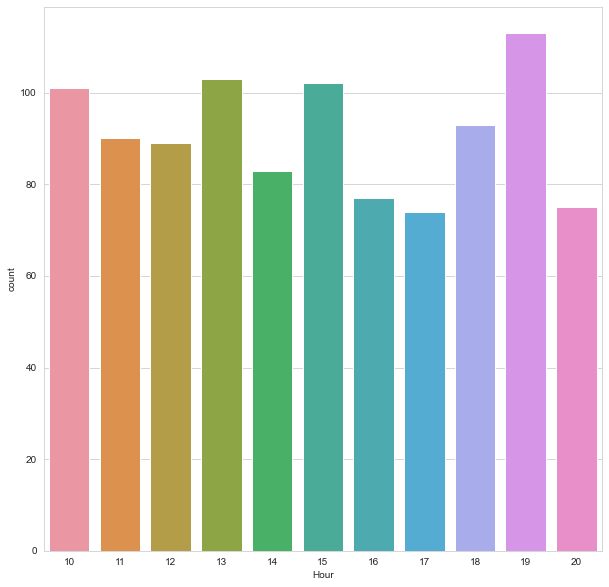

In [67]:
#count plot of Day_time
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.countplot(x='Hour', data=store_data)

<AxesSubplot:xlabel='Day_time', ylabel='count'>

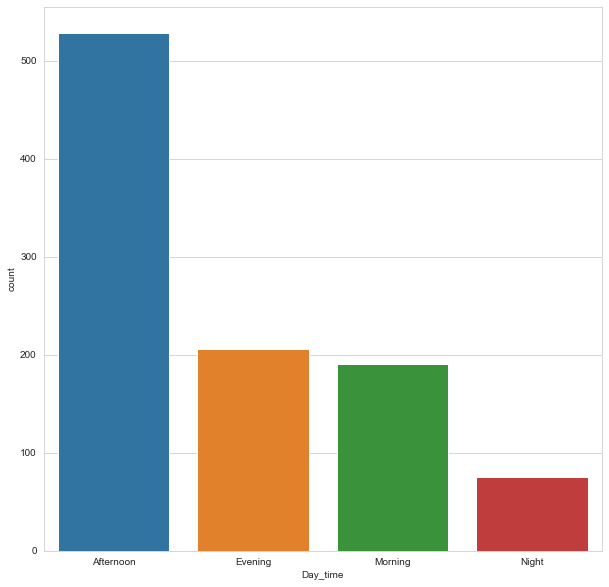

In [68]:
plt.figure(figsize=(10,10))
sns.countplot(x='Day_time', data=store_data)

### Here we can see in afternoon more products were brought and 7pm is the most busiest hour..

In [69]:
#grouyp by Product line with quantity in a new dataframe
quantity_by_product_line = store_data.groupby(['Product line'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
quantity_by_product_line

,Product line,Quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

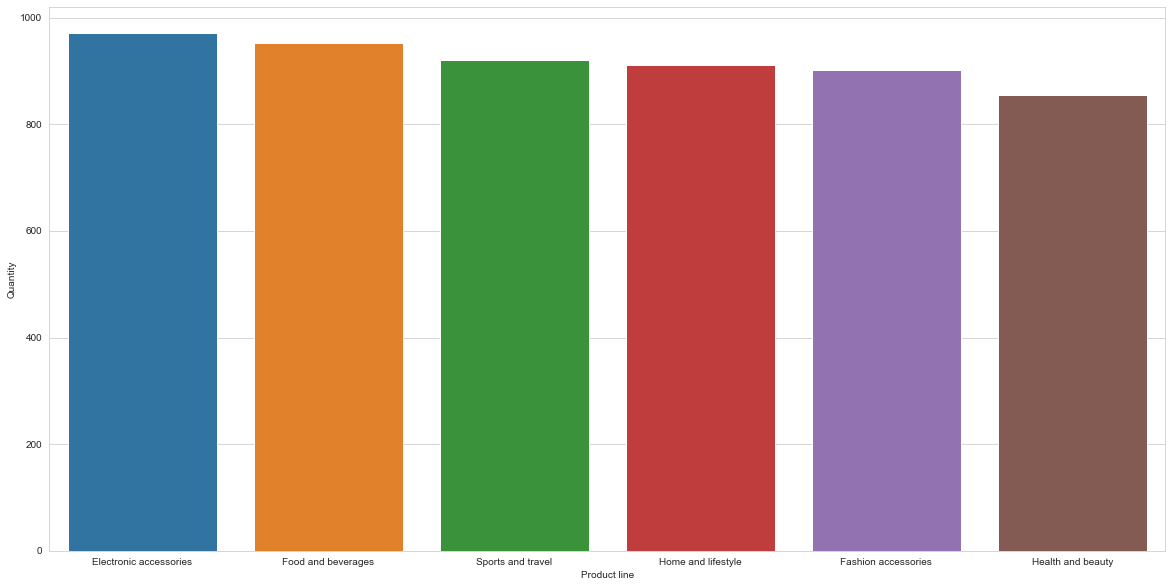

In [70]:
#bar chart of product line with total number of Quantity
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.barplot(x='Product line',y='Quantity', data=quantity_by_product_line)

### We can focus on electrinics accessories instore..

In [71]:
#groupby city and sum of cogs in a new dataframe
df9 = store_data.groupby(['City','Product line'])['cogs'].sum().reset_index().sort_values(by='cogs', ascending=False)
df9

,City,Product line,cogs
8,Naypyitaw,Food and beverages,22635.10
16,Yangon,Home and lifestyle,21349.71
7,Naypyitaw,Fashion accessories,20533.40
5,Mandalay,Sports and travel,19036.38
3,Mandalay,Health and beauty,19029.20
17,Yangon,Sports and travel,18450.19
6,Naypyitaw,Electronic accessories,18065.69
12,Yangon,Electronic accessories,17444.87
4,Mandalay,Home and lifestyle,16713.49
14,Yangon,Food and beverages,16345.81


<AxesSubplot:xlabel='City', ylabel='cogs'>

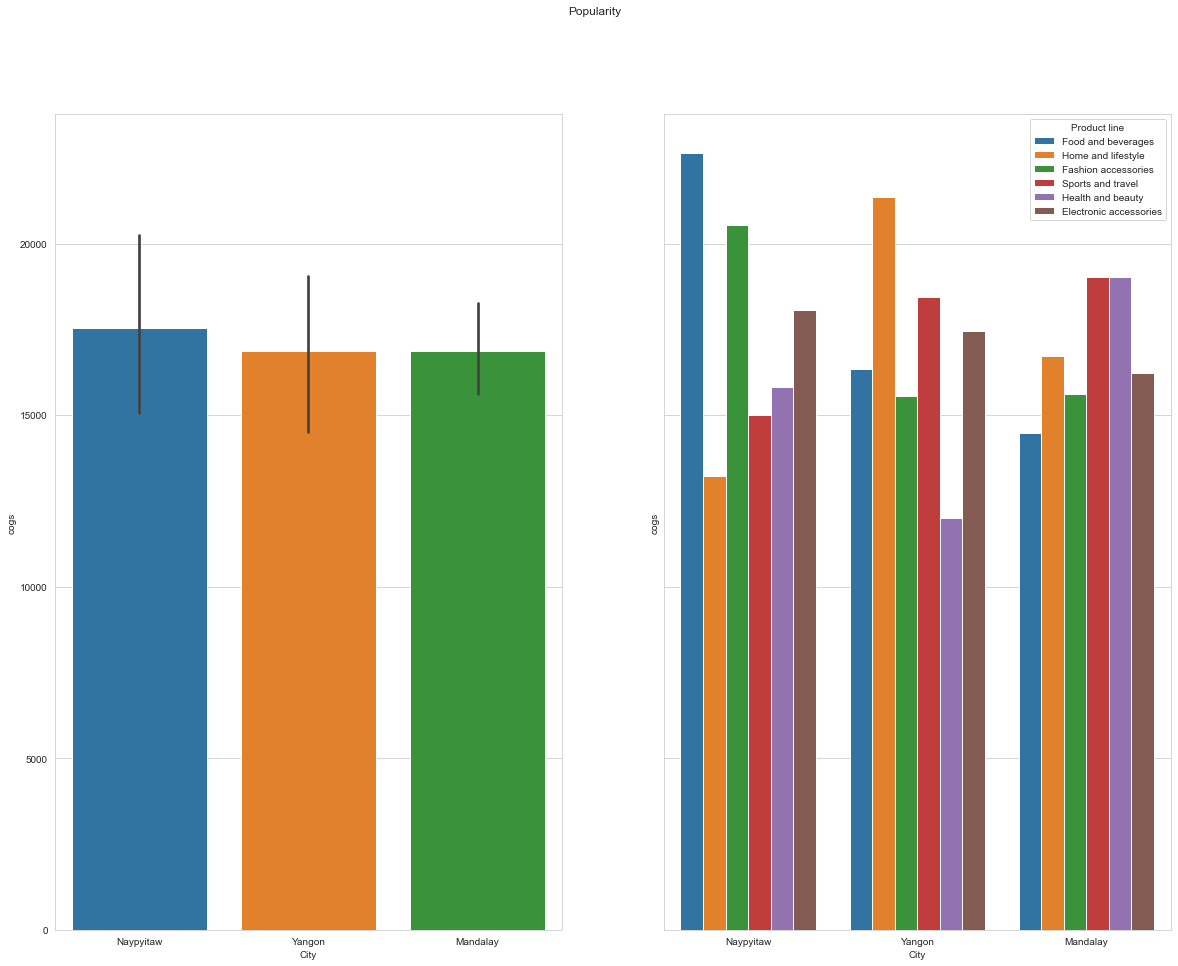

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15), sharey=True)
fig.suptitle("Popularity")
sns.barplot(ax = axes[0],x='City', y='cogs', data=df9)
sns.barplot(ax = axes[1],x='City',y='cogs',hue='Product line',  data=df9)

### We can expand Naypyitaw and we should focus on food and beverages in the city..